Описание задания:
В домашнем задании нужно решить задачу классификации точек наиболее эффективно. Для этого в работе необходимо применить различные методы по отбору признаков. Отбор признаков предпочтительнее осуществлять основываясь на математическом аппарате, поэтому данные для этого задания будут сгенерированы, чтобы избежать признаков с физическим смыслом.
Этапы работы:

Сгенерируйте данные с помощью кода:
from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification(scale=1)
Постройте модель логистической регрессии и оцените среднюю точность. Для этого используйте следующий код:
cross_val_score(LogisticRegression(), x, y, scoring=‘accuracy’).mean()
Используйте статистические методы для отбора признаков:
a) Выберите признаки на основе матрицы корреляции.
b) Отсеките низковариативные признаки (VarianceThreshold).
c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.
Осуществите отбор признаков на основе дисперсионного анализа:
a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).
b) Повторите п. 2 на отобранных признаках.
Отбор с использованием моделей:
a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.
b) Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.
c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.
Перебор признаков:
a) SequentialFeatureSelector.
b) Повторите п. 2 на отобранных признаках.
Сформулируйте выводы по проделанной работе:
a) Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.

### Блок загрузки

In [ ]:
from sklearn.datasets import make_classification
import time
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
x_data_generated, y_data_generated = make_classification(scale=1)


### Функция

In [ ]:
def modelb(x_data_generated,y_data_generated):
  val = cross_val_score(LogisticRegression(), x_data_generated, y_data_generated, scoring='accuracy').mean()
  return val

### Метод №1

In [ ]:
t = time.time()
m1 = modelb(x_data_generated, y_data_generated)
t1 = time.time()-t
m1

0.75

In [ ]:
df = pd.DataFrame(x_data_generated)

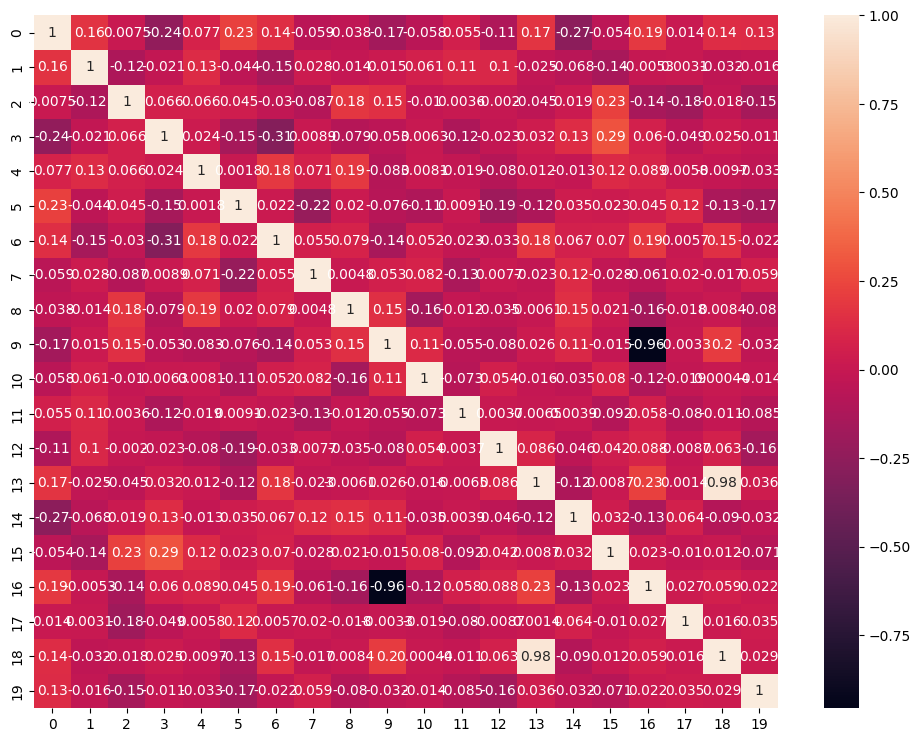

In [ ]:
df_corr = df.corr(method = 'spearman')
plt.figure(figsize=(12,9))
sns.heatmap(df_corr,annot=True)
plt.show()

### Метод №2

In [ ]:
t = time.time()
selector = VarianceThreshold(1)
X = pd.DataFrame(selector.fit_transform(x_data_generated))
m2= modelb(X,y_data_generated)
t2 = time.time()-t
m2

0.78

### Метод №3

In [ ]:
t = time.time()
X3 = SelectKBest(f_classif, k=5).fit_transform(x_data_generated, y_data_generated)
m3= modelb(X3,y_data_generated)
t3 = time.time()-t
m3

0.82

### Метод 4_1

In [ ]:
t = time.time()
X4_1select = SelectFromModel(estimator=LogisticRegression(penalty = 'l1',solver = 'liblinear').fit(x_data_generated, y_data_generated),)
X4_1 = X4select.fit_transform(x_data_generated, y_data_generated)
m4_1 = modelb(X4_1,y_data_generated)
t4_1 = time.time()-t
m4_1

0.75

### Метод 4_2

In [ ]:
t = time.time()
X4rf = RandomForestClassifier(random_state=10)
X4rf = X4rf.fit(x_data_generated, y_data_generated)
X4rf.feature_importances_
X4_2select = SelectFromModel(X4rf, prefit=True)
X4_2 = X4_2select.fit_transform(x_data_generated)
m4_2 = modelb(X4_2,y_data_generated)
t4_2 = time.time()-t
m4_2

0.8

### Метод 5

In [ ]:
t = time.time()
rf = RandomForestClassifier(random_state=10)
sfs = SequentialFeatureSelector(rf)
X5select = sfs.fit(x_data_generated, y_data_generated)
X5tr = sfs.transform(x_data_generated)
m5 = modelb(X5tr,y_data_generated)
t5 = time.time()-t
m5

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


0.79

### Итог

In [ ]:
a = '\n_____________________________\nТочность модели:'
b = ' \nОтбор признаков по: '
c = ' \nВремя выполнения: '
print(a,m2,b, 'Без отбора',c,t1)
print(a,m2,b, 'Статистическим методам',c,t2)
print(a,m3,b, 'Основе дисперсионного анализа',c,t3)
print(a,m4_1,b, 'Модели логистической регрессии',c,t4_1)
print(a,m4_2,b, 'Модели случайного леса',c,t4_2)
print(a,m5,b, 'Перебору признаков',c,t5)


_____________________________
Точность модели: 0.78  
Отбор признаков по:  Без отбора  
Время выполнения:  0.03856992721557617

_____________________________
Точность модели: 0.78  
Отбор признаков по:  Статистическим методам  
Время выполнения:  0.050199031829833984

_____________________________
Точность модели: 0.82  
Отбор признаков по:  Основе дисперсионного анализа  
Время выполнения:  0.029310226440429688

_____________________________
Точность модели: 0.75  
Отбор признаков по:  Модели логистической регрессии  
Время выполнения:  0.03282761573791504

_____________________________
Точность модели: 0.8  
Отбор признаков по:  Модели случайного леса  
Время выполнения:  0.20230364799499512

_____________________________
Точность модели: 0.79  
Отбор признаков по:  Перебору признаков  
Время выполнения:  133.45969343185425
